In [1]:
import json
import os
import pandas as pd

In [2]:
import sys
sys.path.insert(1, '../scripts')

sys.path

from functions import create_df_of_requests

In [3]:
df = create_df_of_requests('../data/requests')

df.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN


In [4]:
from group_locations_helper_functions import group_locations_df

In [5]:
newdf = group_locations_df(df)

newdf.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0


In [6]:
from group_locations_helper_functions import add_max_distance_per_loc_id

In [7]:
newdf2 = add_max_distance_per_loc_id(newdf)

newdf2.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0


In [ ]:
newdf2.head(150)

In [ ]:
filtered  = newdf2[["loc_id", "lat", "lon", "max_group_distance_m"]].drop_duplicates()

filtered.head(150)

In [ ]:
newdf.head(50)

In [ ]:
newdf2[newdf2['loc_id']==2]

In [15]:
newdf2.sort_values(by="max_group_distance_m", ascending=[False])

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
925344,625,2022-06-04,06:49:55,279aa4c6-f785-4f4d-bd6b-8ea3a2255868,EstimateTime,40192,0.630598,0.197905,True,42.0,38733,90.495819
977011,627,2022-06-17,08:27:03,8d9b808c-ba70-4e96-93fd-8f29903040f2,CreateSequence,41549,0.630850,0.197678,False,NaN,38733,90.495819
971906,627,2022-06-08,09:08:00,1c6e36b2-79f6-47ec-bb1e-a9d049177653,CreateSequence,38944,0.630817,0.197705,False,NaN,38733,90.495819
975695,627,2022-06-14,19:12:07,31517133-76ee-4626-b9cc-93627e2850d9,CreateSequence,100,0.631035,0.197522,False,NaN,38733,90.495819
975691,627,2022-06-14,19:12:07,31517133-76ee-4626-b9cc-93627e2850d9,CreateSequence,98,0.630755,0.197739,False,NaN,38733,90.495819
...,...,...,...,...,...,...,...,...,...,...,...,...
2576922,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,148,0.640092,0.311237,True,152.0,120,0.000000
2576923,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,147,0.636873,0.306125,True,153.0,119,0.000000
2576924,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,154,0.648065,0.301981,False,NaN,22,0.000000
2576925,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,155,0.648065,0.301981,False,NaN,22,0.000000


In [27]:
## retry calc distance, now with new function
## from group_locations_helper_functions import group_locations_df_v2

from group_locations_df_v2_helper_func import group_locations_df_v2

In [28]:
newdf3 = group_locations_df_v2(df)

newdf3.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,53639
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,53639
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,53639
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,53639
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,53639


In [29]:
newdf4 = add_max_distance_per_loc_id(newdf3)

newdf4.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,53639,0.0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,53639,0.0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,53639,0.0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,53639,0.0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,53639,0.0


In [30]:
newdf4.sort_values(by="max_group_distance_m", ascending=[False])

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
596012,601,2022-06-15,08:30:35,3eb3ebb5-04f0-4f8f-8ba4-ca65acbda0e0,EstimateTime,58784,0.636125,0.146579,True,5.0,98300,12.778992
594547,601,2022-06-14,06:27:09,a85c349f-6055-4b8e-923e-6f62671ecad3,CreateSequence,58248,0.636075,0.146625,False,NaN,98300,12.778992
592345,601,2022-06-09,19:12:02,7f065954-037c-40b2-a8b6-05823cf52e6a,AddToSequence,20,0.636041,0.146657,True,37.0,98300,12.778992
596316,601,2022-06-15,19:11:37,2eaeafd8-af43-429f-8750-20dace3bc43c,AddToSequence,4,0.636041,0.146657,True,35.0,98300,12.778992
600357,601,2022-06-21,19:12:25,2bc4e5c3-3a44-47b3-8fbb-ef656c51c69b,CreateSequence,36,0.636041,0.146657,False,NaN,98300,12.778992
...,...,...,...,...,...,...,...,...,...,...,...,...
2576922,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,148,0.640092,0.311237,True,152.0,99092,0.000000
2576923,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,147,0.636873,0.306125,True,153.0,98444,0.000000
2576924,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,154,0.648065,0.301981,False,NaN,100837,0.000000
2576925,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,155,0.648065,0.301981,False,NaN,100837,0.000000


## TASK 3

In [13]:
filtered_df = newdf[
    (df["date"] == "2022-05-30") &
    (df["route_id"] == "301")
]
##41931cd2-8975-4a64-9197-d16abe871bb7
filtered_df = filtered_df.sort_values(by="time")

filtered_df

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id
11,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64869,0.650488,0.296025,True,0.0,3
110,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,65021,0.644809,0.310000,True,99.0,81
111,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,65025,0.644863,0.309836,True,100.0,82
112,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64929,0.644928,0.310547,True,101.0,83
113,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64990,0.644928,0.310547,True,102.0,83
...,...,...,...,...,...,...,...,...,...,...,...
420,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,56,0.647755,0.308013,True,101.0,44
419,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,57,0.647755,0.308013,True,100.0,44
418,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,54,0.647464,0.308223,True,99.0,43
425,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,43,0.647447,0.306312,True,106.0,32


<Axes: xlabel='lat'>

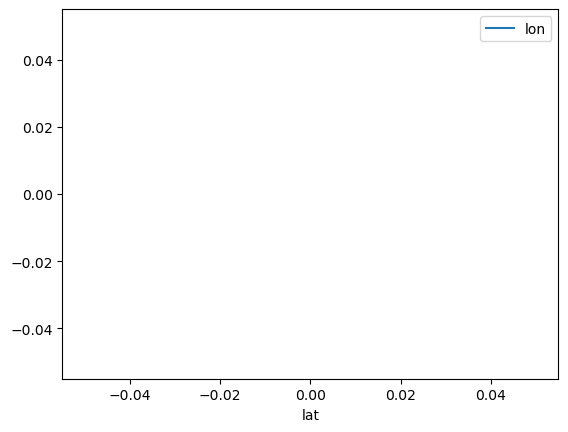

In [ ]:
filtered_df = newdf[
    (df["date"] == "2022-05-30") &
    (df["route_id"] == "301") &
    (df["time"] == "06:45:38")
]
filtered_df = filtered_df.sort_values(by="time")

filtered_df.plot(x = "lat", y = "lon")

## locatie labels toevoegen - dubbelcheck of locaties wel dezelfde zijn


In [ ]:
##filtered_df
##newdf.groupby('loc_id').maximaleafstandbinnengroep
##newdf.groupby('loc_id')[]

## thesde are next steps to check if grouping is actually correct

filtered  = newdf[["loc_id", "lat", "lon", "max_group_distance_m"]].drop_duplicates()

filtered



,loc_id,lat,lon
0,0,0.565826,0.221868
5,1,0.572716,0.233306
7,2,0.564949,0.222236
11,3,0.650488,0.296025
12,4,0.646361,0.297741
...,...,...,...
2573020,100065,0.481522,0.296179
2574501,51299,0.481191,0.296847
2575370,50337,0.488079,0.305585
2575702,50682,0.479680,0.301933


In [19]:
filtered_df = filtered[
    (df["loc_id"] == 21)
]

filtered_df

KeyError: 'loc_id'

task 3a.1.a


In [8]:
def add_amount_routes_changed(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # count unique loc_id per route_id + date + request_id
    counts = (
        df.groupby(["route_id", "date", "request_id"])["loc_id"]
        .nunique()
        .reset_index(name="n_unique_loc")
    )

    # check if counts change across request_id for each route_id + date
    changed = (
        counts.groupby(["route_id", "date"])["n_unique_loc"]
        .nunique()
        .gt(1)  # more than one unique count → changed
        .reset_index(name="amount_routes_changed")
    )

    # merge back to original dataframe
    df = df.merge(changed, on=["route_id", "date"], how="left")

    return df


In [9]:
newdf3 = add_amount_routes_changed(newdf2)

newdf3.head(150)

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m,amount_routes_changed
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0,True
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0,True
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0,True
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0,True
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64955,0.642867,0.303686,True,134.0,107,0.0,True
146,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64977,0.642685,0.303240,True,135.0,108,0.0,True
147,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64986,0.642198,0.302969,True,136.0,109,0.0,True
148,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64919,0.642220,0.304321,True,137.0,110,0.0,True


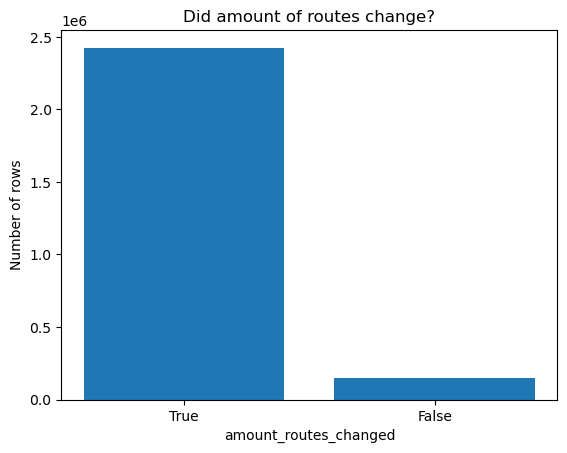

In [10]:
import matplotlib.pyplot as plt

# count True / False
counts = newdf3["amount_routes_changed"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("amount_routes_changed")
plt.ylabel("Number of rows")
plt.title("Did amount of routes change?")
plt.show()

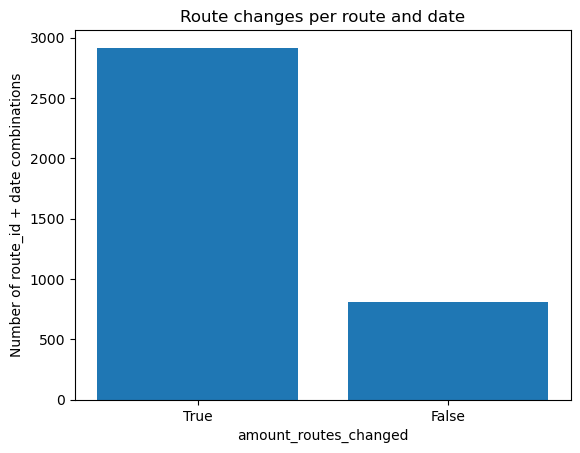

In [11]:
route_level = (
    newdf3[["route_id", "date", "amount_routes_changed"]]
    .drop_duplicates()
)

counts = route_level["amount_routes_changed"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("amount_routes_changed")
plt.ylabel("Number of route_id + date combinations")
plt.title("Route changes per route and date")
plt.show()

task3a.1.c

In [12]:
def add_amount_routes_changed_number(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # get earliest and latest request_id per route_id + date
    req_order = (
        df.groupby(["route_id", "date"])["request_id"]
        .agg(["min", "max"])
        .reset_index()
        .rename(columns={"min": "first_request", "max": "last_request"})
    )

    # loc_ids in first request
    first_locs = (
        df.merge(req_order, on=["route_id", "date"])
        .query("request_id == first_request")
        .groupby(["route_id", "date"])["loc_id"]
        .apply(set)
        .reset_index(name="first_locs")
    )

    # loc_ids in last request
    last_locs = (
        df.merge(req_order, on=["route_id", "date"])
        .query("request_id == last_request")
        .groupby(["route_id", "date"])["loc_id"]
        .apply(set)
        .reset_index(name="last_locs")
    )

    # compare
    diff = (
        first_locs.merge(last_locs, on=["route_id", "date"])
        .assign(
            amount_routes_changed_number=lambda x: x["last_locs"]
            .apply(len)
            - x["first_locs"].apply(len)
        )[["route_id", "date", "amount_routes_changed_number"]]
    )

    # merge back
    df = df.merge(diff, on=["route_id", "date"], how="left")

    return df

In [13]:
newdf4 = add_amount_routes_changed_number(newdf3)

newdf4.head(150)

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m,amount_routes_changed,amount_routes_changed_number
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0,True,-1
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0,True,-1
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0,True,-1
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0,True,-1
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0,True,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64955,0.642867,0.303686,True,134.0,107,0.0,True,0
146,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64977,0.642685,0.303240,True,135.0,108,0.0,True,0
147,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64986,0.642198,0.302969,True,136.0,109,0.0,True,0
148,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64919,0.642220,0.304321,True,137.0,110,0.0,True,0


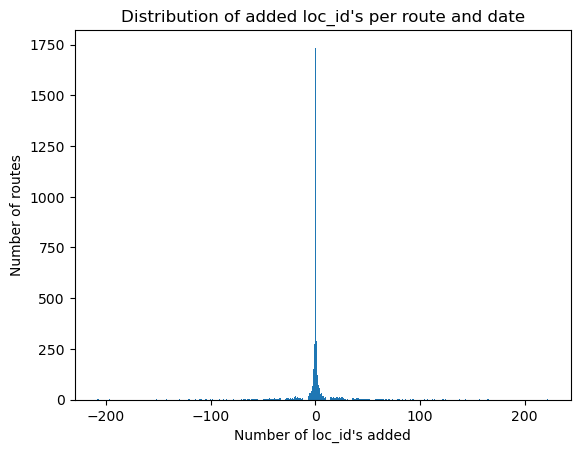

In [14]:
# use one row per route_id + date
route_level = (
    newdf4[["route_id", "date", "amount_routes_changed_number"]]
    .drop_duplicates()
)

counts = route_level["amount_routes_changed_number"].value_counts().sort_index()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Number of loc_id's added")
plt.ylabel("Number of routes")
plt.title("Distribution of added loc_id's per route and date")
plt.show()

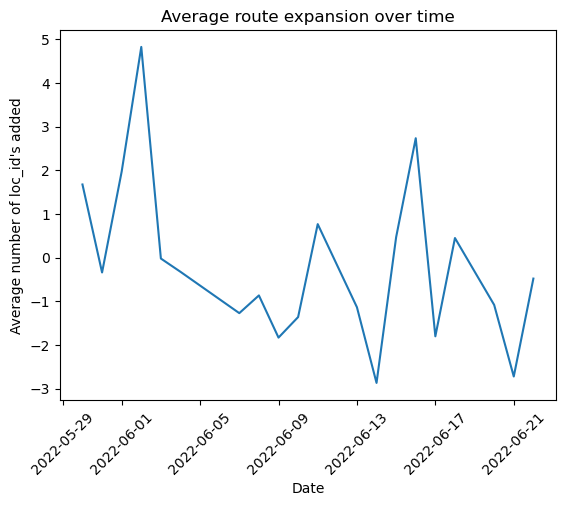

In [15]:
time_plot = (
    route_level
    .groupby("date")["amount_routes_changed_number"]
    .mean()
)

plt.figure()
plt.plot(time_plot.index, time_plot.values)
plt.xlabel("Date")
plt.ylabel("Average number of loc_id's added")
plt.title("Average route expansion over time")
plt.xticks(rotation=45)
plt.show()

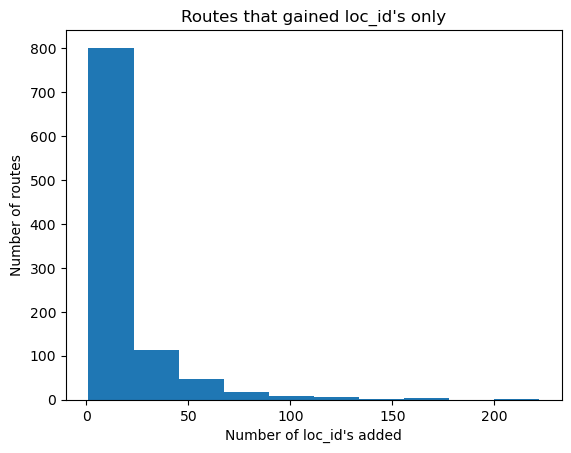

In [16]:
changed_only = route_level.query("amount_routes_changed_number > 0")

plt.figure()
plt.hist(changed_only["amount_routes_changed_number"])
plt.xlabel("Number of loc_id's added")
plt.ylabel("Number of routes")
plt.title("Routes that gained loc_id's only")
plt.show()

task 3a.2.a Per request bepalen of de VOLGORDE van de locaties is gewijzigd (true/false) → binnen 1 route; ook relevant om te weten over routes heen?



In [21]:
import pandas as pd

def add_order_changed(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # build sortable datetime
    df["datetime"] = pd.to_datetime(
        df["date"].astype(str) + " " + df["time"].astype(str)
    )

    # build ordered loc_id sequences per request
    request_sequences = (
        df.sort_values(["route_id", "date", "datetime", "position_fixed"])
        .groupby(["route_id", "date", "request_id"])
        .agg(
            loc_sequence=("loc_id", tuple),
            request_time=("datetime", "min")
        )
        .reset_index()
    )

    # sort requests chronologically
    request_sequences = request_sequences.sort_values(
        ["route_id", "date", "request_time"]
    )

    # compare each request with the previous one
    request_sequences["order_changed"] = (
        request_sequences
        .groupby(["route_id", "date"])["loc_sequence"]
        .shift()
        .ne(request_sequences["loc_sequence"])
    )

    # first request is always False
    request_sequences["order_changed"] = (
        request_sequences["order_changed"].fillna(False)
    )

    # merge back to original dataframe
    df = df.merge(
        request_sequences[
            ["route_id", "date", "request_id", "order_changed"]
        ],
        on=["route_id", "date", "request_id"],
        how="left"
    )

    # cleanup
    df = df.drop(columns=["datetime"])

    return df


In [22]:
newdf5 = add_order_changed(newdf4)

newdf5.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m,amount_routes_changed,amount_routes_changed_number,order_changed
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0,True,-1,True
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0,True,-1,True
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0,True,-1,False
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0,True,-1,False
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0,True,-1,True


task 3a.2.b Eventueel bijkomende vraag: is het relevant hoeveel task id’s van volgorde gewijzigd zijn - ofwel per request in een route ofwel over de routes heen? 


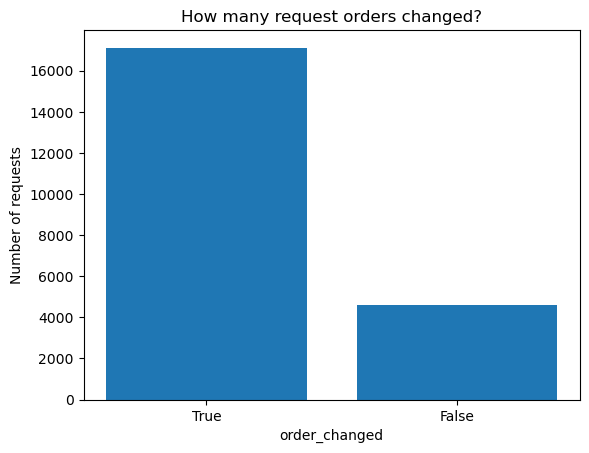

In [24]:
# one row per request
request_level = (
    newdf5[["route_id", "date", "request_id", "order_changed"]]
    .drop_duplicates()
)

counts = request_level["order_changed"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("order_changed")
plt.ylabel("Number of requests")
plt.title("How many request orders changed?")
plt.show()

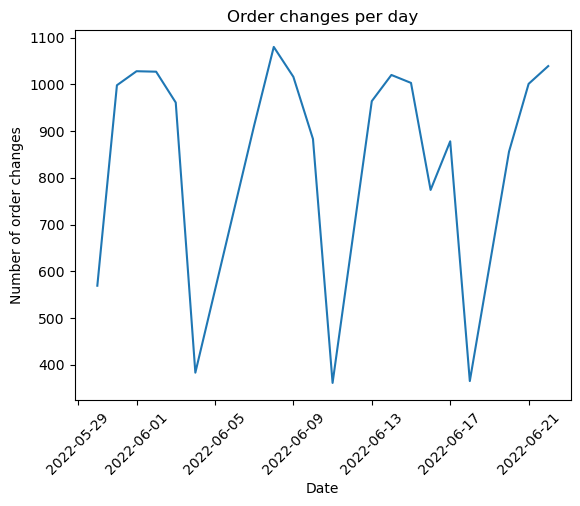

In [25]:
daily_changes = (
    request_level
    .groupby("date")["order_changed"]
    .sum()
)

plt.figure()
plt.plot(daily_changes.index, daily_changes.values)
plt.xlabel("Date")
plt.ylabel("Number of order changes")
plt.title("Order changes per day")
plt.xticks(rotation=45)
plt.show()

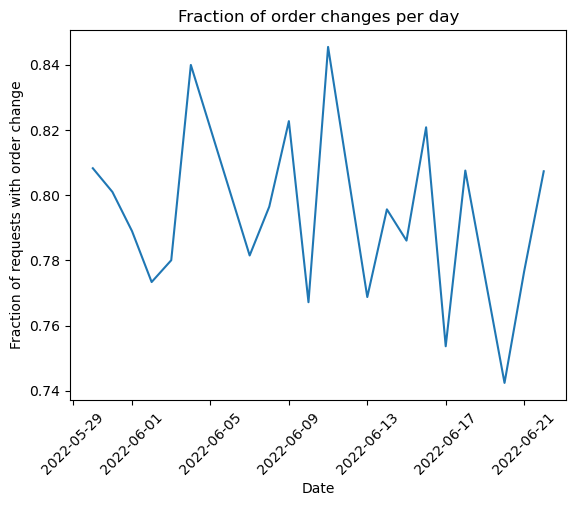

In [26]:
daily_fraction = (
    request_level
    .groupby("date")["order_changed"]
    .mean()
)

plt.figure()
plt.plot(daily_fraction.index, daily_fraction.values)
plt.xlabel("Date")
plt.ylabel("Fraction of requests with order change")
plt.title("Fraction of order changes per day")
plt.xticks(rotation=45)
plt.show()